# Proyecto Mineria de Datos (Arboles de Decision)

---
Alumno: Angel Alonso Galarza Chavez <br>
Materia: Mineria de Datos <br>
Docente: Dra. Xiaoou Li

---

## Importando las bibliotecas

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from chefboost import Chefboost as chef

from IPython.display import display, HTML

## Analisis Exploratorio de Datos

### Cargando el Dataset

In [6]:
# Lista con los nombres de las caracteristicas
attr_names = ['ID', 'Diagnostic']
for i in range(1, 31):
    new_attr = f"e_{i}"
    attr_names.append(new_attr)

print(attr_names)

['ID', 'Diagnostic', 'e_1', 'e_2', 'e_3', 'e_4', 'e_5', 'e_6', 'e_7', 'e_8', 'e_9', 'e_10', 'e_11', 'e_12', 'e_13', 'e_14', 'e_15', 'e_16', 'e_17', 'e_18', 'e_19', 'e_20', 'e_21', 'e_22', 'e_23', 'e_24', 'e_25', 'e_26', 'e_27', 'e_28', 'e_29', 'e_30']


In [7]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_cancer = pd.read_csv('../Datasets/breast+cancer+wisconsin+diagnostic/wdbc.data', header=None, names=attr_names)
df_cancer.head()

,ID,Diagnostic,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,...,e_21,e_22,e_23,e_24,e_25,e_26,e_27,e_28,e_29,e_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Descripcion del conjunto de datos
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
e_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
e_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
e_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
e_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
e_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
e_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
e_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
e_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
e_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [10]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnostic  569 non-null    object 
 2   e_1         569 non-null    float64
 3   e_2         569 non-null    float64
 4   e_3         569 non-null    float64
 5   e_4         569 non-null    float64
 6   e_5         569 non-null    float64
 7   e_6         569 non-null    float64
 8   e_7         569 non-null    float64
 9   e_8         569 non-null    float64
 10  e_9         569 non-null    float64
 11  e_10        569 non-null    float64
 12  e_11        569 non-null    float64
 13  e_12        569 non-null    float64
 14  e_13        569 non-null    float64
 15  e_14        569 non-null    float64
 16  e_15        569 non-null    float64
 17  e_16        569 non-null    float64
 18  e_17        569 non-null    float64
 19  e_18        569 non-null    f

### Histograma de los atributos

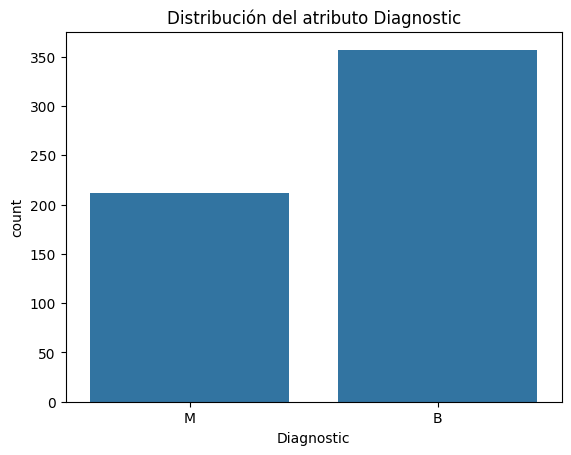

In [32]:
# Gráfico de barras más estético con Seaborn
sns.countplot(x='Diagnostic', data=df_cancer)
plt.title('Distribución del atributo Diagnostic')
plt.show()

In [29]:
# Correlacion
#data_matrix = df_cancer.pivot(index='index', columns='column', values='value')
for i in range(2, 31):
    print(attr_names[i] + ' x ' + attr_names[i + 1])
    correlation = np.corrcoef(df_cancer.iloc[:, i], df_cancer.iloc[:, i])[0, 1]
    print(correlation)

e_1 x e_2
1.0
e_2 x e_3
0.9999999999999998
e_3 x e_4
1.0
e_4 x e_5
0.9999999999999999
e_5 x e_6
1.0
e_6 x e_7
1.0
e_7 x e_8
1.0
e_8 x e_9
0.9999999999999998
e_9 x e_10
0.9999999999999999
e_10 x e_11
0.9999999999999999
e_11 x e_12
1.0
e_12 x e_13
1.0
e_13 x e_14
1.0
e_14 x e_15
1.0
e_15 x e_16
1.0
e_16 x e_17
1.0
e_17 x e_18
1.0
e_18 x e_19
1.0
e_19 x e_20
1.0
e_20 x e_21
0.9999999999999999
e_21 x e_22
0.9999999999999998
e_22 x e_23
0.9999999999999999
e_23 x e_24
0.9999999999999998
e_24 x e_25
0.9999999999999998
e_25 x e_26
1.0
e_26 x e_27
1.0
e_27 x e_28
1.0
e_28 x e_29
1.0
e_29 x e_30
1.0


## Preprocesamiento de Datos

### Limpieza de los datos

Se elimnara la columna ID ya que no aporta informacion para la construccion del modelo

In [38]:
# Eliminar la columna 'Columna_a_eliminar'
df_cancer = df_cancer.drop('ID', axis=1)
df_cancer.head()

,Diagnostic,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_21,e_22,e_23,e_24,e_25,e_26,e_27,e_28,e_29,e_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Transformacion de los datos

In [39]:
#Transformando la columna Target a valores numericos {iris-setosa = 0, iris-versicolor = 1, iris-virginica = 2}
#Con LabelEncoder
#Encode target labels with value between 0 and n_classes-1.

# Transformacion de la columan target a formato numerico (justificar)
df_cancer_le = df_cancer.copy()

le = LabelEncoder()

df_cancer_le['Diagnostic'].unique()
df_cancer_le['Diagnostic'] = le.fit_transform(df_cancer_le['Diagnostic'])
df_cancer_le['Diagnostic'].unique()

array([1, 0])

In [41]:
x_data = df_cancer_le.drop('Diagnostic', axis = 1)

In [42]:
# Normalizacion de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_data)

In [46]:
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(X_scaled)

In [60]:
y_data = df_cancer_le['Diagnostic']
y_data.value_counts()

Diagnostic
0    357
1    212
Name: count, dtype: int64

In [48]:
# Division del dataset (entrenamiento 70%, prueba 30%)
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y_data, test_size=0.3 ,random_state=31)
print('Dimensiones de datos de entrenamienot')
print(str(x_train.shape) + ' ' + str(y_train.shape))
print('Dimensiones de datos de prueba')
print(str(x_test.shape) + ' ' + str(y_test.shape))

Dimensiones de datos de entrenamienot
(398, 7) (398,)
Dimensiones de datos de prueba
(171, 7) (171,)


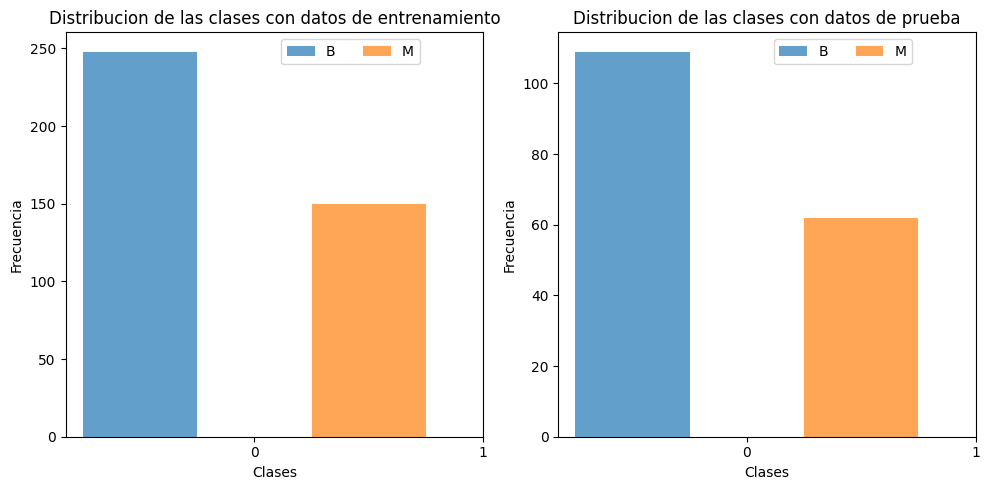

In [61]:
# observando la distribucion de target con los datos de entrenamiento y prueba
colors = ['tab:blue', 'tab:orange']  # Lista de colores para cada barra
plt.figure(figsize=(10, 5))
labels = ['B', 'M']

plt.subplot(1, 2, 1)
counts, bins = np.histogram(y_train, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(1, 2, 2)
counts, bins = np.histogram(y_test, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de prueba')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1), ncol=3)

plt.tight_layout()
plt.show()

## Construccion del Modelo

In [62]:
## Construccion del modelo con scikit-learn
clf = DecisionTreeClassifier(random_state = 31)

### Entrenamiento del modelo CART sin ajuste de hiperparametros

In [63]:
### entrenamiento del modelo sin validacion cruzada
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=31)

In [68]:
y_predict = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

### Entrenamiento del modelo CART con ajuste de hiperparametros

In [70]:
# Seleccion de hiperparametros para la busqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 6]
}

In [71]:
# instanciando la busqueda y pasando los parametros
clf_gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=4, scoring='accuracy')

In [72]:
clf_gs.fit(x_train, y_train)

C:\Users\Angel\miniconda3\envs\main\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=31),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [73]:
best_model = clf_gs.best_estimator_
y_predict_gs = best_model.predict(x_test)
y_pred_proba_gs = best_model.predict_proba(x_test)[:, 1]

In [74]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", clf_gs.best_params_)
print("Mejor puntuación de validación cruzada:", clf_gs.best_score_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntuación de validación cruzada: 0.9321717171717172


### Entrenamiento del modelo C4.5 sin ajuste de hiperparametros

In [110]:
#dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], test_size=0.3 ,random_state=31)

data_train = pd.DataFrame(data = x_train)
data_train['target'] = df_cancer['Diagnostic']

In [111]:
data_test = pd.DataFrame(data = x_test)

In [112]:
y_test = y_test.replace({1: 'B', 0: 'M'})

In [113]:
config = {'algorithm': 'C4.5'}
# Entrenar el modelo
model = chef.fit(data_train, config, target_label='target', silent = True)

In [114]:
# Hacer predicciones en el conjunto de prueba
c4_5_predictions = []
for i in range(data_test.shape[0]):
    registro = data_test.iloc[i].tolist()
    #print(registro)
    #break
    c4_5_predictions.append(chef.predict(model, registro))

### Entrenamiento del modelo C4.5 con ajuste de hiperparametros

In [132]:
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], test_size=0.3 ,random_state=31)

data_train = pd.DataFrame(data = dfx_train, columns = iris_names)
data_train['target'] = dfy_train

In [104]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'algorithm': 'C4.5'
}

best_accuracy = 0
best_params = {}
# Bucle para realizar Grid Search
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        c4_5_predictions = []
        # Configurar el modelo
        config = {
            'algorithm': param_grid['algorithm'],
            'tree_type': 'classification',
            'input': data_train.columns[:-1].tolist(),
            'output': data_train['target'],
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
        }

        # Entrenar el modelo
        model = chef.fit(data_train, config, target_label='target', silent = True)

        # Hacer predicciones en el conjunto de prueba
        for i in range(data_test.shape[0]):
            registro = data_test.iloc[i].tolist()
            #print(registro)
            #break
            c4_5_predictions.append(chef.predict(model, registro))

        # Calcular la precisión
        c4_5_accuracy = accuracy_score(y_test, c4_5_predictions)

        # Actualizar los mejores parámetros si es necesario
        if c4_5_accuracy > best_accuracy:
            best_accuracy = c4_5_accuracy
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'algorithm': 'C4.5'
            }

# Mostrar los mejores hiperparámetros y la mejor precisión
print("Mejores hiperparámetros:", best_params)
print("Mejor precisión:", best_accuracy)

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_split': 2, 'algorithm': 'C4.5'}
Mejor precisión: 0.6608187134502924


In [105]:
C4_5_model = chef.fit(data_train, config = best_params, target_label='target', silent = True)

c4_5_predictions = []
for i in range(data_test.shape[0]):
    registro = data_test.iloc[i].tolist()
    #print(i[:])
    c4_5_predictions.append(chef.predict(model, registro))

## Evaluacion del Modelo

### Evaluacion del modelo CART sin ajuste de hiperparametros

In [65]:
test_score = clf.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.8947368421052632


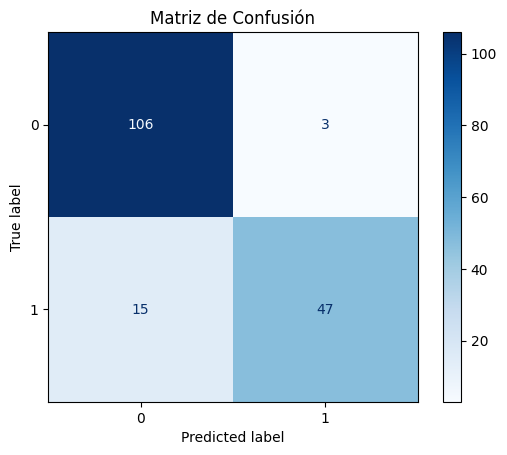

In [67]:
### Metricas a utlizar (matriz de confusion)
target_names = ['0', '1']

c_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

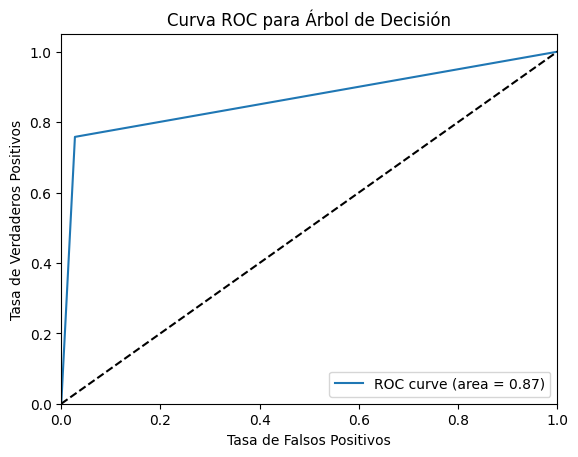

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

### Evaluacion del modelo CART con ajuste de hiperparametros

In [75]:
test_score = best_model.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.935672514619883


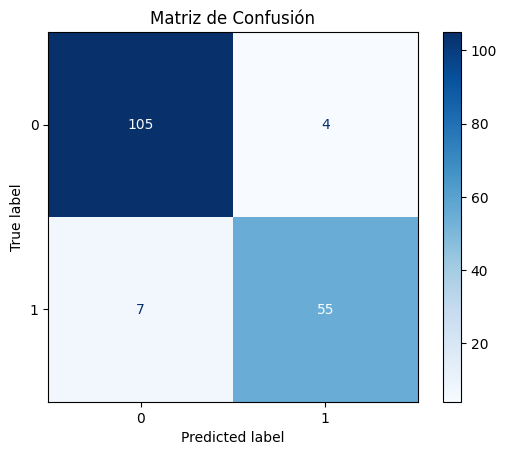

In [76]:
c_matrix_gs = confusion_matrix(y_test, y_predict_gs)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_gs, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

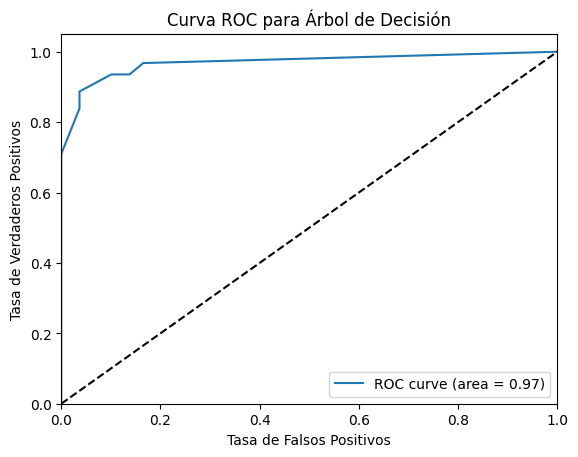

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gs)
auc = roc_auc_score(y_test, y_pred_proba_gs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

### Evaluacion del modelo C4.5 sin ajuste de hiperparametros

In [115]:
c4_5_accuracy = accuracy_score(y_test, c4_5_predictions)
print(c4_5_accuracy)

0.6491228070175439


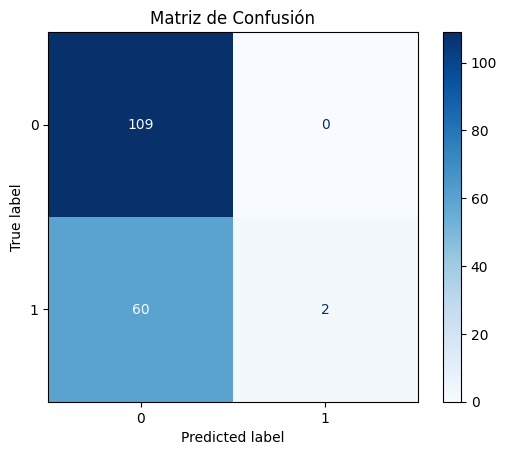

In [116]:
c_matrix_c4_5 = confusion_matrix(y_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Evaluacion del modelo C4.5 con ajuste de hiperparametros

In [107]:
c4_5_accuracy = accuracy_score(y_test, c4_5_predictions)
print(c4_5_accuracy)

0.6608187134502924


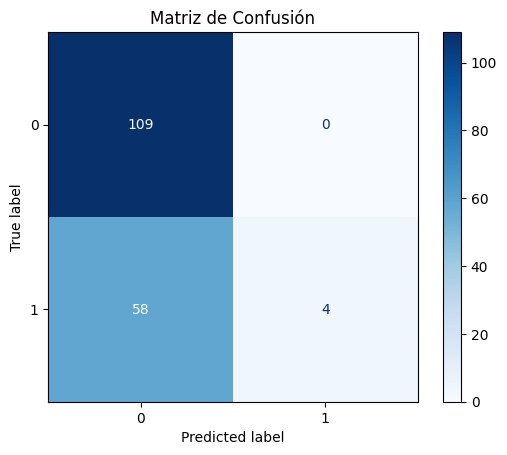

In [109]:
c_matrix_c4_5 = confusion_matrix(y_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Visualizacion del arbol

### Visualizacion del arbol sin ajuste de hiperparametros

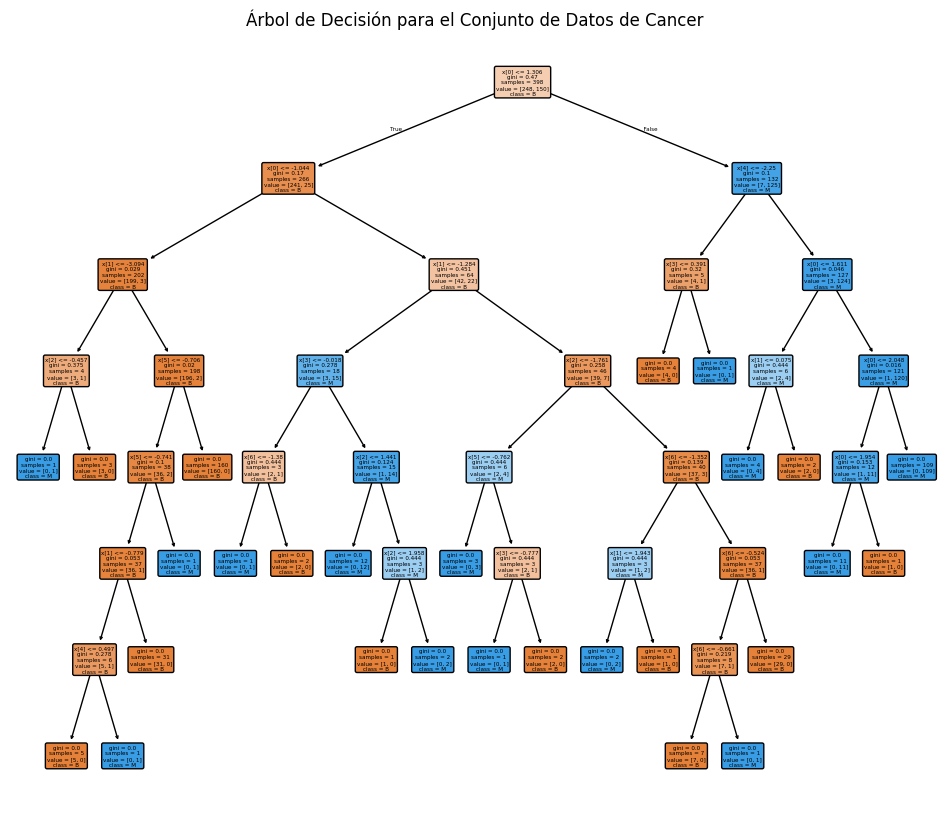

In [117]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(clf, class_names = ['B', 'M'], filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Cancer")
plt.show()

### Visualizacion del arbol con ajuste de hiperparametros

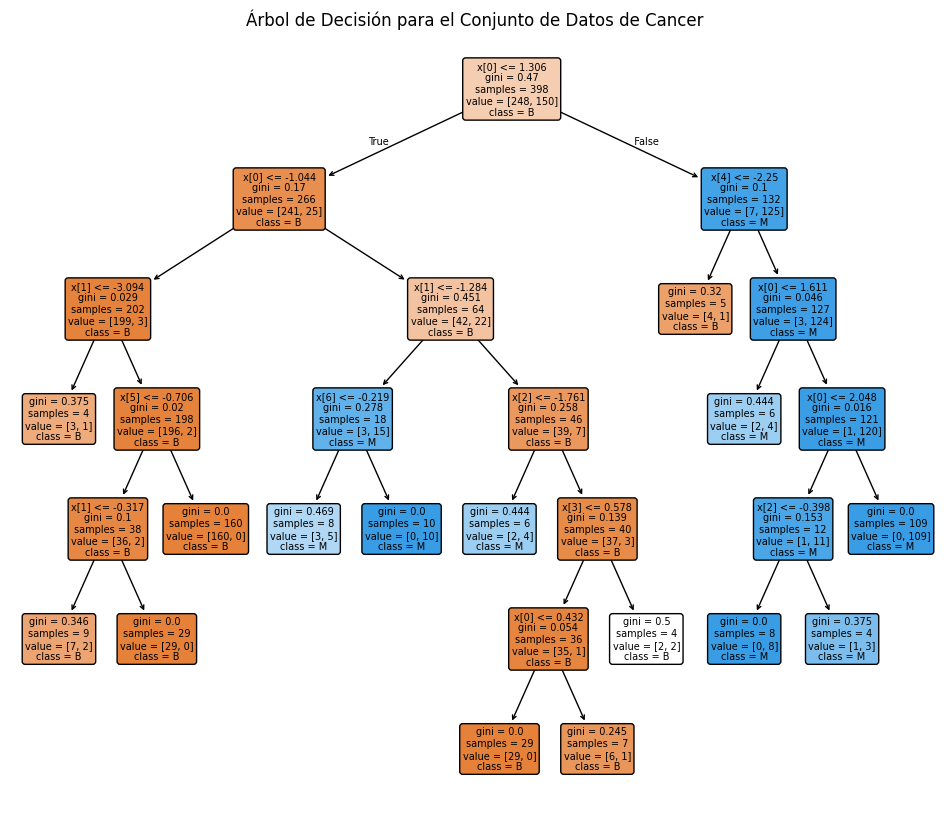

In [118]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(best_model, class_names = ['B', 'M'], filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Cancer")
plt.show()

## Conclusiones